<a href="https://colab.research.google.com/github/RybakovAlex/Python-for-Analythics/blob/main/%D0%91%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82_%22GB_Homework_7_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Урок 7. Предобработка данных и построение предиктивных моделей в Scikit-learn

1. Взять все признаки из датасета с урока. Применить модель Random Forest.
2. Рассчитайте MAE, MSE, R2 на тренировочной и тестовой выборке.
3. Посмотрите, как показатели качества соотносятся с коэффициентом корреляции этих признаков и целевого значения, а также между собой.
4. Сравнить показатели качества новой модели с моделью с урока и сделать вывод.

In [55]:
# Инициализация и загрузка данных
from matplotlib import pyplot as plt
# %matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
wine_data = load_wine()
print(wine_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [57]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
x = pd.DataFrame(np.hstack([raw_df.values[::2, ], raw_df.values[1::2, :2]]),
columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 'RAD', 'TAX', 'PIRATIO', 'B', 'LSTAT'])
y = raw_df.values[1::2, 2]

In [58]:
x = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
y = wine_data.target

<Axes: >

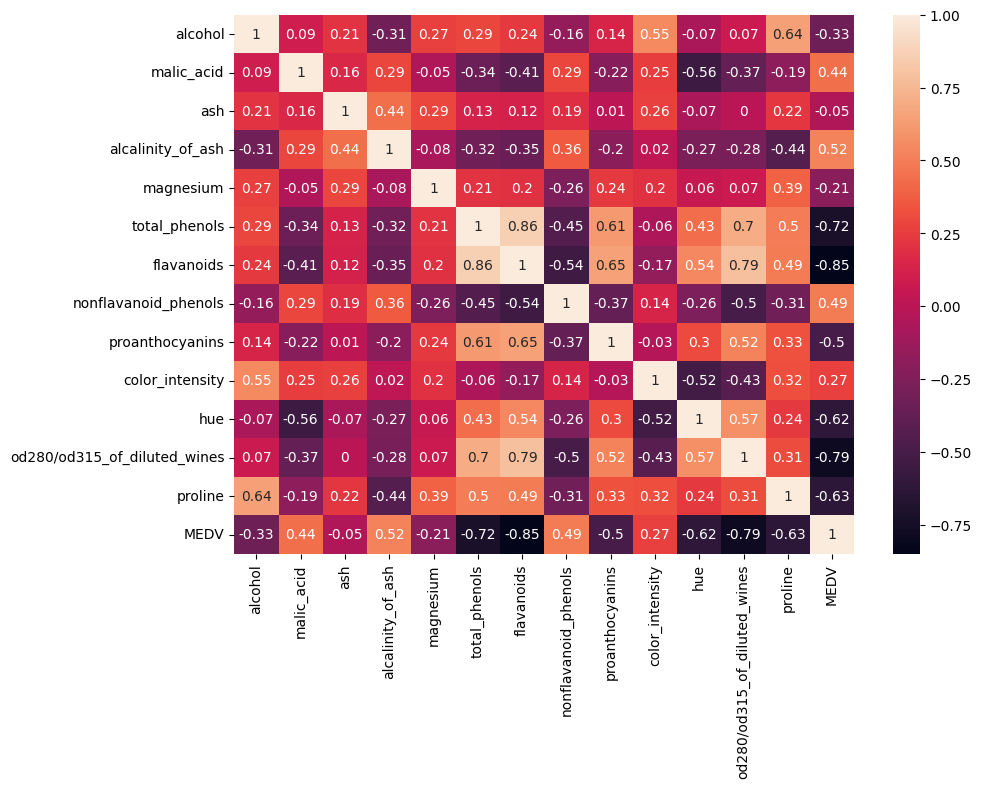

In [59]:
# Выбираем наборы признаков
x_corr = x.copy()
x_corr['MEDV'] = y
correlation_matrix = x_corr.corr().round(2)
plt.subplots(figsize=(10,7))
sns.heatmap(data=correlation_matrix, annot=True)

In [60]:
# Первый набор признаков
features = [['hue', 'malic_acid'],
            ['hue', 'malic_acid', 'color_intensity'],
            ['hue', 'malic_acid', 'color_intensity', 'total_phenols'],
            ['flavanoids', 'nonflavanoid_phenols'],
            ['flavanoids', 'malic_acid']]

In [61]:
# Оцениваем результат
metrics = pd.DataFrame(columns=['Features', 'MAE train', 'MAE test', 'MSE train', 'MSE test', 'R2 train', 'R2 test'])
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

for future in features:
  x_future_test = x.loc[:, future]
  x_train, x_test, y_train, y_test = train_test_split(x_future_test, y, test_size = 0.2, random_state=5)

  regr = LinearRegression()
  regr.fit(x_train, y_train)
  pred_train = regr.predict(x_train)
  pred_test = regr.predict(x_test)

  metrics = metrics.append({'Features' : future,
                          'MAE train' : mean_absolute_error(y_train, pred_train),
                          'MAE test' : mean_absolute_error(y_test, pred_test),
                          'MSE train' : mean_squared_error(y_train, pred_train),
                          'MSE test' : mean_squared_error(y_test, pred_test),
                          'R2 train' : r2_score(y_train, pred_train),
                          'R2 test' : r2_score(y_test, pred_test)}, ignore_index=True)
print(metrics)
print('\033[93m'+'Оптимальная совокупность: [flavanoids, nonflavanoid_phenols] (0.704831  0.746271)')

                                            Features  MAE train  MAE test  MSE train  MSE test  R2 train   R2 test
0                                  [hue, malic_acid]   0.496710  0.616818   0.330849  0.501136  0.426870  0.206993
1                 [hue, malic_acid, color_intensity]   0.496856  0.613931   0.329582  0.496725  0.429064  0.213974
2  [hue, malic_acid, color_intensity, total_phenols]   0.379906  0.417949   0.217292  0.225923  0.623584  0.642496
3                 [flavanoids, nonflavanoid_phenols]   0.320488  0.339201   0.170391  0.160343  0.704831  0.746271
4                           [flavanoids, malic_acid]   0.309545  0.343175   0.160832  0.176806  0.721390  0.720219
Оптимальная совокупность: [flavanoids, nonflavanoid_phenols] (0.704831  0.746271)


<ipython-input-61-143902a5ff6b>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
<ipython-input-61-143902a5ff6b>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
<ipython-input-61-143902a5ff6b>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
<ipython-input-61-143902a5ff6b>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
<ipython-input-61-143902a5ff6b>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

In [62]:
# Второй набор признаков
features_2 = [['malic_acid', 'flavanoids'],
              ['malic_acid', 'flavanoids', 'nonflavanoid_phenols'],
              ['malic_acid', 'flavanoids', 'nonflavanoid_phenols', 'proline'],
              ['proline', 'alcalinity_of_ash'],
              ['proanthocyanins', 'nonflavanoid_phenols']]

In [63]:
# Оцениваем результат
metrics = pd.DataFrame(columns=['Features', 'MAE train', 'MAE test', 'MSE train', 'MSE test', 'R2 train', 'R2 test'])
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

for future in features_2:
  x_future_test = x.loc[:, future]
  x_train, x_test, y_train, y_test = train_test_split(x_future_test, y, test_size = 0.2, random_state=5)

  transformer = Normalizer().fit(x_train.loc[:, x_train.columns])
  x_train = pd.DataFrame(transformer.transform(x_train.loc[:, x_train.columns]), index = x_train.index, columns = x_train.columns)
  x_test = pd.DataFrame(transformer.transform(x_test.loc[:, x_test.columns]), index = x_test.index, columns = x_test.columns)

  regr = LinearRegression()
  regr.fit(x_train, y_train)
  pred_train = regr.predict(x_train)
  pred_test = regr.predict(x_test)

  metrics = metrics.append({'Features' : future,
                          'MAE train' : mean_absolute_error(y_train, pred_train),
                          'MAE test' : mean_absolute_error(y_test, pred_test),
                          'MSE train' : mean_squared_error(y_train, pred_train),
                          'MSE test' : mean_squared_error(y_test, pred_test),
                          'R2 train' : r2_score(y_train, pred_train),
                          'R2 test' : r2_score(y_test, pred_test)}, ignore_index=True)
print(metrics)
print('\033[93m'+'Оптимальная совокупность: [malic_acid, flavanoids, nonflavanoid_phenols] ( 0.720140  0.597683)')

                                            Features  MAE train  MAE test  MSE train  MSE test  R2 train   R2 test
0                           [malic_acid, flavanoids]   0.373716  0.474226   0.196096  0.304577  0.660303  0.518032
1     [malic_acid, flavanoids, nonflavanoid_phenols]   0.340482  0.436966   0.161554  0.254242  0.720140  0.597683
2  [malic_acid, flavanoids, nonflavanoid_phenols,...   0.420252  0.508355   0.246430  0.346749  0.573109  0.451299
3                       [proline, alcalinity_of_ash]   0.433737  0.473174   0.249844  0.325929  0.567194  0.484245
4            [proanthocyanins, nonflavanoid_phenols]   0.483701  0.593180   0.329173  0.442778  0.429773  0.299341
Оптимальная совокупность: [malic_acid, flavanoids, nonflavanoid_phenols] ( 0.720140  0.597683)


<ipython-input-63-d04f86cadf8f>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
<ipython-input-63-d04f86cadf8f>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
<ipython-input-63-d04f86cadf8f>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
<ipython-input-63-d04f86cadf8f>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
<ipython-input-63-d04f86cadf8f>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

In [64]:
from xgboost import XGBRegressor

metrics = pd.DataFrame(columns=['Features', 'MAE train', 'MAE test', 'MSE train', 'MSE test', 'R2 train', 'R2 test'])
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

for future in features_2:
  x_future_test = x.loc[:, future]
  x_train, x_test, y_train, y_test = train_test_split(x_future_test, y, test_size = 0.2, random_state=5)

  regr = XGBRegressor(n_estimators = 13)
  regr. fit(x_train, y_train)
  pred_train = regr.predict(x_train)
  pred_test = regr.predict(x_test)
  metrics = metrics.append({'Features' : future,
                          'MAE train' : mean_absolute_error(y_train, pred_train),
                          'MAE test' : mean_absolute_error(y_test, pred_test),
                          'MSE train' : mean_squared_error(y_train, pred_train),
                          'MSE test' : mean_squared_error(y_test, pred_test),
                          'R2 train' : r2_score(y_train, pred_train),
                          'R2 test' : r2_score(y_test, pred_test)}, ignore_index=True)
print(metrics)

<ipython-input-64-7cfbf839fee6>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
<ipython-input-64-7cfbf839fee6>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,


                                            Features  MAE train  MAE test  MSE train  MSE test  R2 train   R2 test
0                           [malic_acid, flavanoids]   0.052885  0.208028   0.008042  0.123517  0.986070  0.804544
1     [malic_acid, flavanoids, nonflavanoid_phenols]   0.034854  0.247976   0.003421  0.149404  0.994075  0.763581
2  [malic_acid, flavanoids, nonflavanoid_phenols,...   0.015396  0.134251   0.000704  0.088700  0.998781  0.859639
3                       [proline, alcalinity_of_ash]   0.122848  0.388188   0.036637  0.477395  0.936534  0.244561
4            [proanthocyanins, nonflavanoid_phenols]   0.129493  0.545911   0.028791  0.452301  0.950125  0.284271


<ipython-input-64-7cfbf839fee6>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
<ipython-input-64-7cfbf839fee6>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
<ipython-input-64-7cfbf839fee6>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,


In [72]:
from sklearn.ensemble import RandomForestRegressor

metrics = pd.DataFrame(columns=['Features', 'MAE train', 'MAE test', 'MSE train', 'MSE test', 'R2 train', 'R2 test'])
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

for future in features_2:
  x_future_test = x.loc[:, future]
  x_train, x_test, y_train, y_test = train_test_split(x_future_test, y, test_size = 0.2, random_state=5)

  regr = RandomForestRegressor()
  regr. fit(x_train, y_train)
  pred_train = regr.predict(x_train)
  pred_test = regr.predict(x_test)
  metrics = metrics.append({'Features' : future,
                          'MAE train' : mean_absolute_error(y_train, pred_train),
                          'MAE test' : mean_absolute_error(y_test, pred_test),
                          'MSE train' : mean_squared_error(y_train, pred_train),
                          'MSE test' : mean_squared_error(y_test, pred_test),
                          'R2 train' : r2_score(y_train, pred_train),
                          'R2 test' : r2_score(y_test, pred_test)}, ignore_index=True)
print(metrics)
regr.feature_importances_
print('\033[93m'+'Оптимальная совокупность: [malic_acid, flavanoids, nonflavanoid_phenols,...]')

<ipython-input-72-3e1202c293eb>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
<ipython-input-72-3e1202c293eb>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
<ipython-input-72-3e1202c293eb>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
<ipython-input-72-3e1202c293eb>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,


                                            Features  MAE train  MAE test  MSE train  MSE test  R2 train   R2 test
0                           [malic_acid, flavanoids]   0.093732  0.201111   0.022785  0.113772  0.960529  0.819965
1     [malic_acid, flavanoids, nonflavanoid_phenols]   0.089507  0.216111   0.021030  0.117917  0.963569  0.813407
2  [malic_acid, flavanoids, nonflavanoid_phenols,...   0.051479  0.155278   0.011377  0.086497  0.980292  0.863125
3                       [proline, alcalinity_of_ash]   0.138122  0.344861   0.045925  0.327092  0.920444  0.482404
4            [proanthocyanins, nonflavanoid_phenols]   0.175799  0.546622   0.049653  0.398508  0.913986  0.369393
Оптимальная совокупность: [malic_acid, flavanoids, nonflavanoid_phenols,...]


<ipython-input-72-3e1202c293eb>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,


In [71]:
from lightgbm import LGBMRegressor

metrics = pd.DataFrame(columns=['Features', 'MAE train', 'MAE test', 'MSE train', 'MSE test', 'R2 train', 'R2 test'])
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

for future in features_2:
  x_future_test = x.loc[:, future]
  x_train, x_test, y_train, y_test = train_test_split(x_future_test, y, test_size = 0.2, random_state=5)

  regr = LGBMRegressor()
  regr. fit(x_train, y_train)
  pred_train = regr.predict(x_train)
  pred_test = regr.predict(x_test)
  metrics = metrics.append({'Features' : future,
                          'MAE train' : mean_absolute_error(y_train, pred_train),
                          'MAE test' : mean_absolute_error(y_test, pred_test),
                          'MSE train' : mean_squared_error(y_train, pred_train),
                          'MSE test' : mean_squared_error(y_test, pred_test),
                          'R2 train' : r2_score(y_train, pred_train),
                          'R2 test' : r2_score(y_test, pred_test)}, ignore_index=True)
print(metrics)
print('\033[93m'+'Оптимальная совокупность: [malic_acid, flavanoids, nonflavanoid_phenols,...] (0.960194  0.849011))')

                                            Features  MAE train  MAE test  MSE train  MSE test  R2 train   R2 test
0                           [malic_acid, flavanoids]   0.201963  0.290009   0.076559  0.146055  0.867377  0.768881
1     [malic_acid, flavanoids, nonflavanoid_phenols]   0.184958  0.295880   0.063367  0.147746  0.890229  0.766204
2  [malic_acid, flavanoids, nonflavanoid_phenols,...   0.090105  0.166179   0.022979  0.095417  0.960194  0.849011
3                       [proline, alcalinity_of_ash]   0.271293  0.355075   0.134140  0.310114  0.767629  0.509270
4            [proanthocyanins, nonflavanoid_phenols]   0.367197  0.566798   0.187393  0.398049  0.675378  0.370120
Оптимальная совокупность: [malic_acid, flavanoids, nonflavanoid_phenols,...] (0.960194  0.849011))


<ipython-input-71-9c9af9fe5d65>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
<ipython-input-71-9c9af9fe5d65>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
<ipython-input-71-9c9af9fe5d65>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
<ipython-input-71-9c9af9fe5d65>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
<ipython-input-71-9c9af9fe5d65>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

In [74]:
from sklearn.ensemble import RandomForestRegressor

metrics = pd.DataFrame(columns=['Features', 'MAE train', 'MAE test', 'MSE train', 'MSE test', 'R2 train', 'R2 test'])
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

x_future_test = x.copy()
x_train, x_test, y_train, y_test = train_test_split(x_future_test, y, test_size = 0.2, random_state=5)

regr = RandomForestRegressor()
regr. fit(x_train, y_train)
pred_train = regr.predict(x_train)
pred_test = regr.predict(x_test)

regr.feature_importances_

array([0.03537866, 0.00346875, 0.00207275, 0.00759544, 0.00445295,
       0.00183082, 0.32901754, 0.00058879, 0.00348067, 0.07879676,
       0.05780021, 0.13181851, 0.34369814])

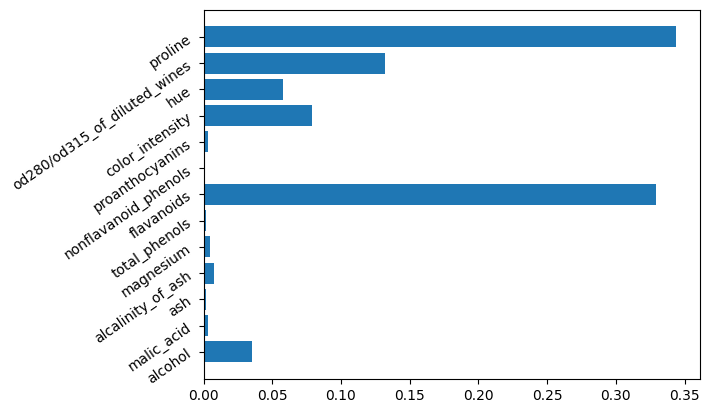

In [78]:
from matplotlib import pyplot as plt

plt.figure()
plt.barh(x.columns, regr.feature_importances_)
plt.yticks(rotation=35)
plt.show()